In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/learning-agency-lab-automated-essay-scoring-2/sample_submission.csv
/kaggle/input/learning-agency-lab-automated-essay-scoring-2/train.csv
/kaggle/input/learning-agency-lab-automated-essay-scoring-2/test.csv


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('/kaggle/input/learning-agency-lab-automated-essay-scoring-2/train.csv')
test = pd.read_csv('/kaggle/input/learning-agency-lab-automated-essay-scoring-2/test.csv')
sub = pd.read_csv('/kaggle/input/learning-agency-lab-automated-essay-scoring-2/sample_submission.csv')
train

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3
...,...,...,...
17302,ffd378d,"the story "" The Challenge of Exploing Venus "" ...",2
17303,ffddf1f,Technology has changed a lot of ways that we l...,4
17304,fff016d,If you don't like sitting around all day than ...,2
17305,fffb49b,"In ""The Challenge of Exporing Venus,"" the auth...",1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17307 entries, 0 to 17306
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   essay_id   17307 non-null  object
 1   full_text  17307 non-null  object
 2   score      17307 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 405.8+ KB


In [12]:
train["len_text"] = train.full_text.apply(lambda x:len(x))
train.len_text

0        2677
1        1669
2        3077
3        2701
4        2208
         ... 
17302     856
17303    3354
17304    1122
17305    1427
17306     786
Name: len_text, Length: 17307, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


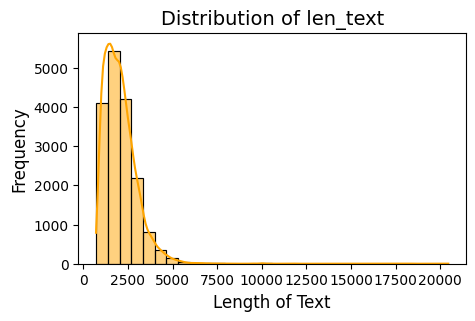

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))

sns.histplot(train['len_text'], bins=30, kde=True, color='orange')

plt.title('Distribution of len_text', fontsize=14)
plt.xlabel('Length of Text', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


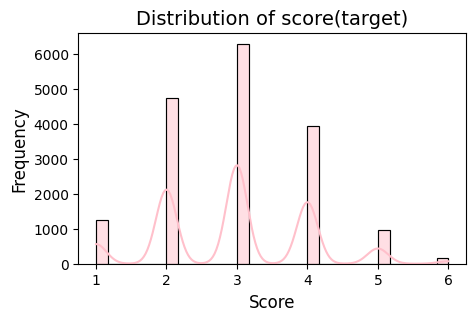

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))

sns.histplot(train['score'], bins=30, kde=True, color='pink')

plt.title('Distribution of score(target)', fontsize=14)
plt.xlabel('Score', fontsize=12)`
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [17]:
pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 61.8 MB/s eta 0:00:00:00:010:01
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
from spellchecker import SpellChecker

spell = SpellChecker()

# 오타 개수를 세는 함수
def count_typos(text):
    if not isinstance(text, str):  # NaN 값 방지
        return 0
    words = text.split()  # 공백을 기준으로 단어 분리
    misspelled = spell.unknown(words)  # 오타 찾기
    return len(misspelled)  # 오타 개수 반환

train['typo_count'] = train['full_text'].apply(count_typos)
train

,essay_id,full_text,score,len_text,typo_count
0,000d118,Many people have car where they live. The thin...,3,2677,50
1,000fe60,I am a scientist at NASA that is discussing th...,3,1669,32
2,001ab80,People always wish they had the same technolog...,4,3077,43
3,001bdc0,"We all heard about Venus, the planet without a...",4,2701,44
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,2208,40
...,...,...,...,...,...
17302,ffd378d,"the story "" The Challenge of Exploing Venus "" ...",2,856,22
17303,ffddf1f,Technology has changed a lot of ways that we l...,4,3354,61
17304,fff016d,If you don't like sitting around all day than ...,2,1122,13
17305,fffb49b,"In ""The Challenge of Exporing Venus,"" the auth...",1,1427,30


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


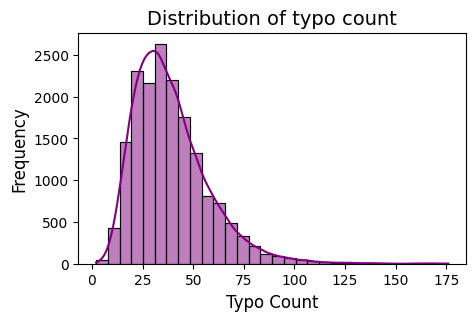

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))

sns.histplot(train['typo_count'], bins=30, kde=True, color='purple')

plt.title('Distribution of typo count', fontsize=14)
plt.xlabel('Typo Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [23]:
import numpy as np
#단어 개수
train['word_count'] = train['full_text'].apply(lambda x: len(str(x).split()))
#문장 개수
train['sentence_count'] = train['full_text'].apply(lambda x: len(str(x).split('.')))
#평균 단어 길이 - 어려운 단어 사용하는지
train['avg_word_length'] = train['full_text'].apply(lambda x: np.mean([len(word) for word in str(x).split()]) if len(str(x).split()) > 0 else 0)
#평균 문장 길이 - 
train['avg_sentence_length'] = train['word_count'] / (train['sentence_count'] + 1)

In [ ]:
train['word_count']

In [24]:
from collections import Counter
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def lexical_diversity(text):
    words = str(text).split()
    unique_words = set(words)
    return len(unique_words) / (len(words) + 1)  # 0분모 방지

def stopword_ratio(text):
    words = str(text).split()
    stopword_count = sum(1 for word in words if word.lower() in stop_words)
    return stopword_count / (len(words) + 1)

train['unique_word_ratio'] = train['full_text'].apply(lexical_diversity)
train['stopword_ratio'] = train['full_text'].apply(stopword_ratio)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 21.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.0 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [27]:
from textstat import flesch_reading_ease, syllable_count

#글을 읽는 난이도
train['flesch_readability'] = train['full_text'].apply(flesch_reading_ease)
#음절 개수를 기반으로 문장의 난이도 평가
train['syllable_count'] = train['full_text'].apply(lambda x: syllable_count(str(x)))

In [29]:
pip install language_tool_python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
# import language_tool_python

# tool = language_tool_python.LanguageTool('en-US')

# def grammar_errors(text):
#     return len(tool.check(str(text)))

# #문법 오류 개수
# train['grammar_errors'] = train['full_text'].apply(grammar_errors)

KeyboardInterrupt: 

In [31]:
import language_tool_python
import pandas as pd
from multiprocessing import Pool
from tqdm import tqdm

def init_tool():
    global tool
    tool = language_tool_python.LanguageTool('en-US')

# 문법 오류 개수를 세는 함수
def count_grammar_errors(text):
    return len(tool.check(str(text))) if isinstance(text, str) else 0

def parallel_process(text_list, num_workers=4):
    with Pool(num_workers, initializer=init_tool) as pool:
        results = []
        with tqdm(total=len(text_list), desc="Processing Grammar Errors") as pbar:
            for result in pool.imap_unordered(count_grammar_errors, text_list):
                results.append(result)
                pbar.update(1)
        return results

#문법 오 개수
train['grammar_errors'] = parallel_process(train['full_text'], num_workers=4)
train.head()

Processing Grammar Errors: 100%|██████████| 17307/17307 [1:09:30<00:00,  4.15it/s]


,essay_id,full_text,score,len_text,typo_count,word_count,sentence_count,avg_word_length,avg_sentence_length,unique_word_ratio,stopword_ratio,flesch_readability,syllable_count,grammar_errors
0,000d118,Many people have car where they live. The thin...,3,2677,50,498,14,4.369478,33.200000,0.507014,0.494990,57.98,664,53
1,000fe60,I am a scientist at NASA that is discussing th...,3,1669,32,332,20,4.018072,15.809524,0.531532,0.567568,79.09,416,11
2,001ab80,People always wish they had the same technolog...,4,3077,43,550,25,4.574545,21.153846,0.459165,0.493648,56.69,826,19
3,001bdc0,"We all heard about Venus, the planet without a...",4,2701,44,451,24,4.982262,18.040000,0.555310,0.426991,49.86,735,16
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,2208,40,373,16,4.873995,21.941176,0.433155,0.481283,46.20,614,7


In [34]:
from collections import Counter
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def lexical_diversity(text):
    words = str(text).split()
    unique_words = set(words)
    return len(unique_words) / (len(words) + 1)

def stopword_ratio(text):
    words = str(text).split()
    stopword_count = sum(1 for word in words if word.lower() in stop_words)
    return stopword_count / (len(words) + 1)


#단어의 다양성 비율
train['unique_word_ratio'] = train['full_text'].apply(lexical_diversity)
#불용어 개수
train['stopword_ratio'] = train['full_text'].apply(stopword_ratio)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
train.to_csv('/kaggle/working/train_dp.csv', index = False)